In [35]:
#load random forest library
library(randomForest)

In [36]:
#load map count matrix
temp_samples <- read.delim('map_to_contigs.tsv')
samples <- temp_samples[2:25]
row.names(samples) <- as.vector(temp_samples[,1])

In [37]:
#set up groups "adjacent tissue" (healty) and "tumor" labels
group <- rep(c("H","T"),12)
HH <- rep(c(TRUE,FALSE),12)
TT <- rep(c(FALSE,TRUE),12)
sample_labels <- paste0(rep(c("H","T"),12),c(rbind(sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)),sprintf("%03d", c(1,2,3,4,5,6,7,9,10,11,12,13)))))
colvect <- ifelse(HH,"red","blue")


Call:
 randomForest(x = t(samples), y = as.factor(group), ntree = 5000,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 5000
No. of variables tried at each split: 22

        OOB estimate of  error rate: 70.83%
Confusion matrix:
   H T class.error
H  5 7   0.5833333
T 10 2   0.8333333

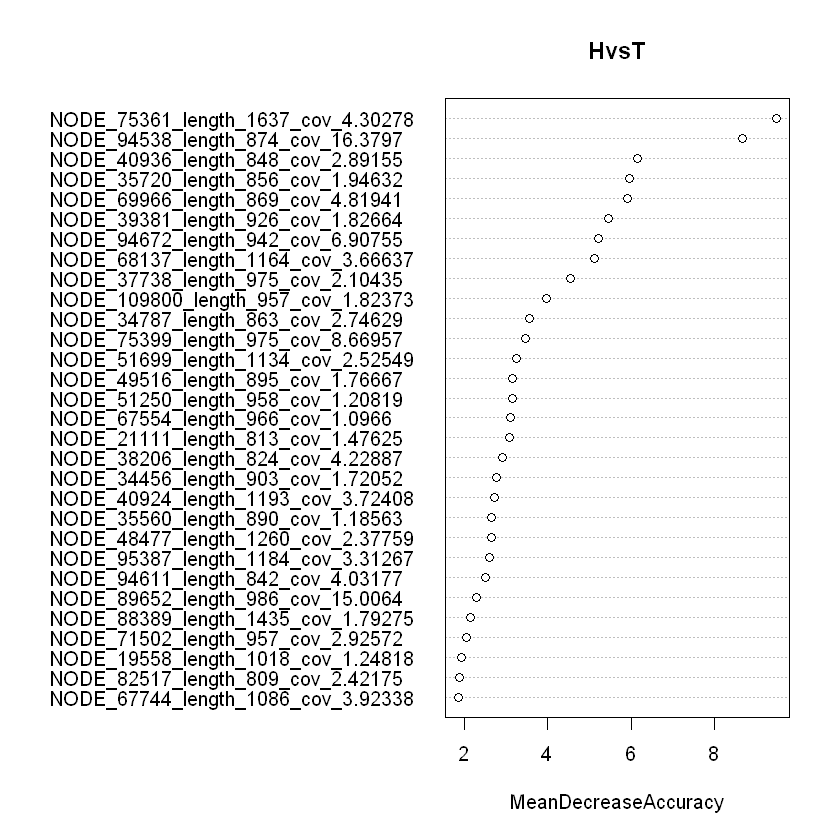

In [38]:
#first random forest, note that the OOB error rate is high
ht_rf <- randomForest(x=t(samples),y=as.factor(group), importance=TRUE, ntree=5000)
varImpPlot(ht_rf, type = 1,main="HvsT")
ht_rf


Call:
 randomForest(x = t(ht_samples2), y = as.factor(group), ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 7

        OOB estimate of  error rate: 20.83%
Confusion matrix:
  H  T class.error
H 9  3   0.2500000
T 2 10   0.1666667

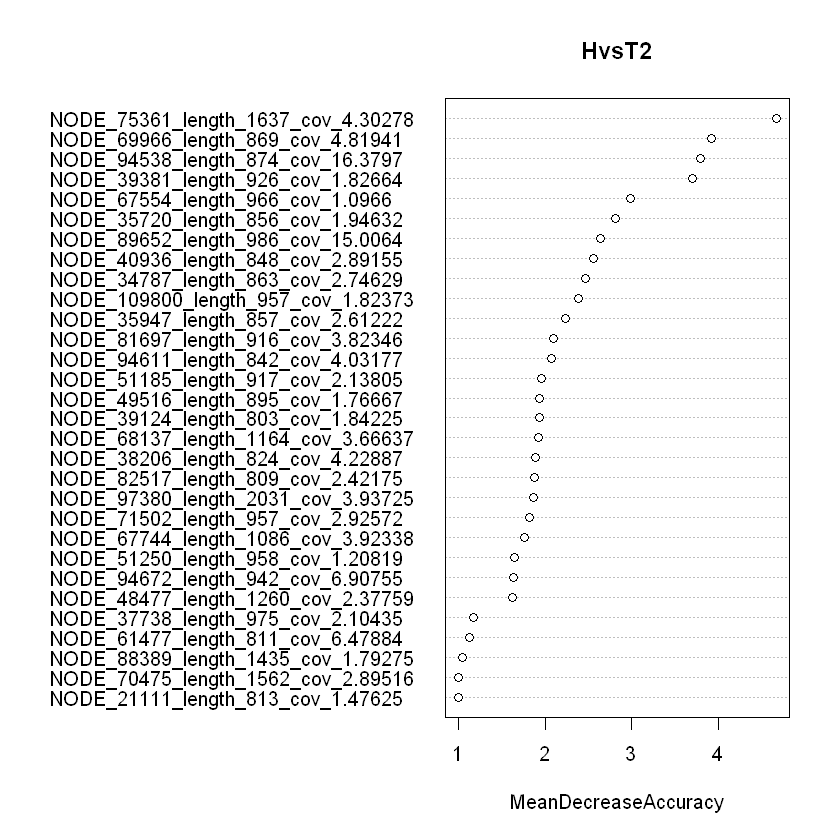

In [39]:
#take the 50 feture with greater decrease accuracy and redo the random forest
ht_samples2 <- samples[rownames(ht_rf$importance[order(ht_rf$importance[,3],decreasing = TRUE),])[1:50],]
ht_rf2 <- randomForest(x=t(ht_samples2),y=as.factor(group), importance=TRUE, ntree=500)
varImpPlot(ht_rf2, type = 1,main="HvsT2")
ht_rf2

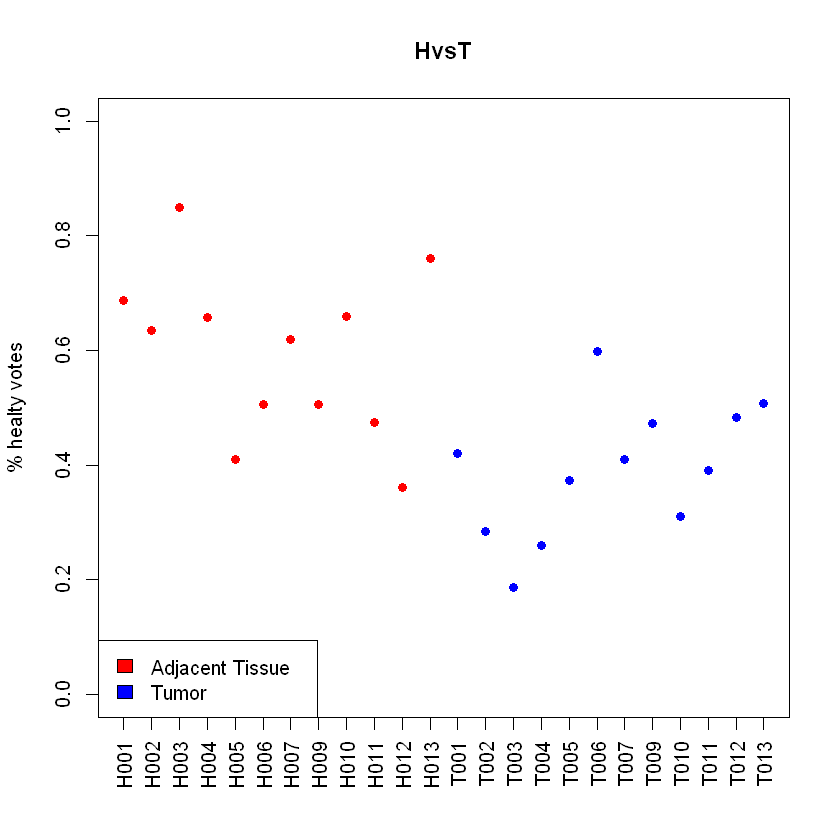

In [40]:
#print the votes proportions for the second random forest
ordered <- c(ht_rf2$votes[,1][HH],ht_rf2$votes[,1][TT]) #horder the votes to get the healty first
order_color <- c(rep("red",sum(HH)),rep("blue",sum(TT))) # same with colors
plot(ordered,col=order_color,ylim=c(0,1),main="HvsT", pch=16,xaxt='n',xlab = "",ylab = "% healty votes")
axis(1, at=1:24, labels=c(sample_labels[HH],sample_labels[TT]),las=2)
legend("bottomleft",legend=c("Adjacent Tissue","Tumor"),fill=c("red","blue"))

In [41]:
#write and print the table of the top 50 features

#reorder features according to the importance of the 2nd random forest
ht_samples3 <- samples[rownames(ht_rf2$importance[order(ht_rf2$importance[,3],decreasing = TRUE),])[1:50],]
colnames(ht_samples3)<-sample_labels
write.table(ht_samples3,file=paste0("best_hits.txt"), quote = FALSE)


In [42]:
#ht_samples3

In [43]:
#install.packages("pwr")
library(pwr)

In [44]:
pp=0.9
aa=0.05

[1] 2.833333

[1] 0.5833333

[1] 2.598076


     Paired t test power calculation 

              n = 16.05425
              d = 0.8660254
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number of *pairs*


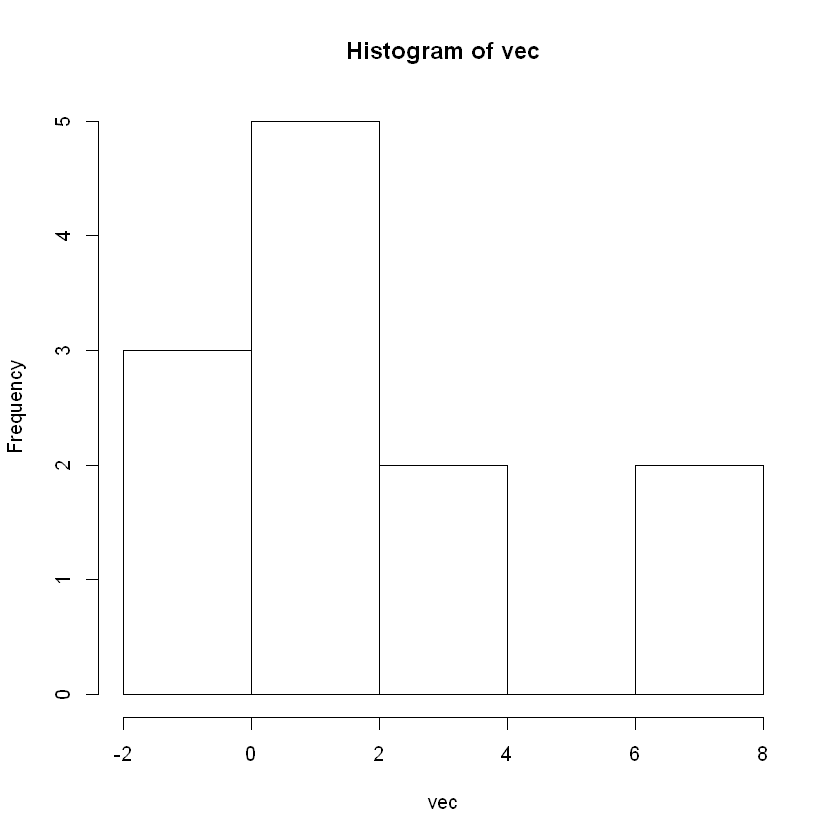

In [45]:
num='NODE_75361_length_1637_cov_4.30278'
vec <-as.numeric(ht_samples3[num,HH])-as.numeric(ht_samples3[num,TT])
hist(vec)
m1 <-mean(as.numeric(ht_samples3[num,HH]))
m1
m2 <-mean(as.numeric(ht_samples3[num,TT]))
m2
ss<-sd(vec)
ss
pwr.t.test(d=(m1-m2)/ss,power=pp,sig.level=aa,type="paired",alternative="two.sided")

[1] 15.58333

[1] 10.25

[1] 11.71117


     Paired t test power calculation 

              n = 52.62235
              d = 0.4554057
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number of *pairs*


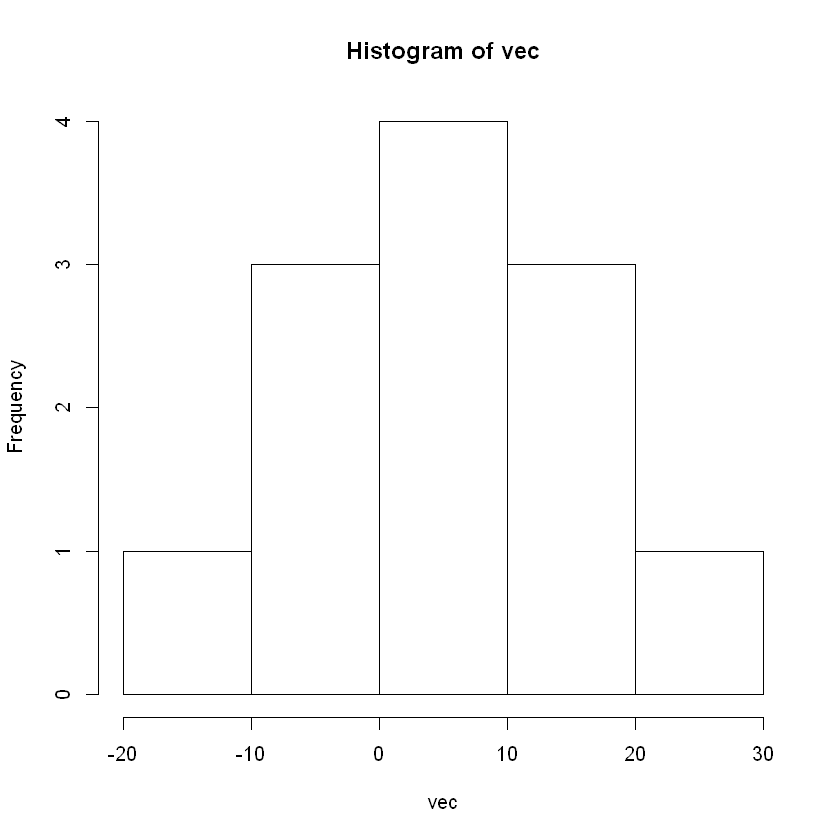

In [46]:
num='NODE_75399_length_975_cov_8.66957'
vec <-as.numeric(ht_samples3[num,HH])-as.numeric(ht_samples3[num,TT])
hist(vec)
m1 <-mean(as.numeric(ht_samples3[num,HH]))
m1
m2 <-mean(as.numeric(ht_samples3[num,TT]))
m2
ss<-sd(vec)
ss
pwr.t.test(d=(m1-m2)/ss,power=pp,sig.level=aa,type="paired",alternative="two.sided")

[1] 15.41667

[1] 6.583333

[1] 14.13463


     Paired t test power calculation 

              n = 28.89338
              d = 0.6249425
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number of *pairs*


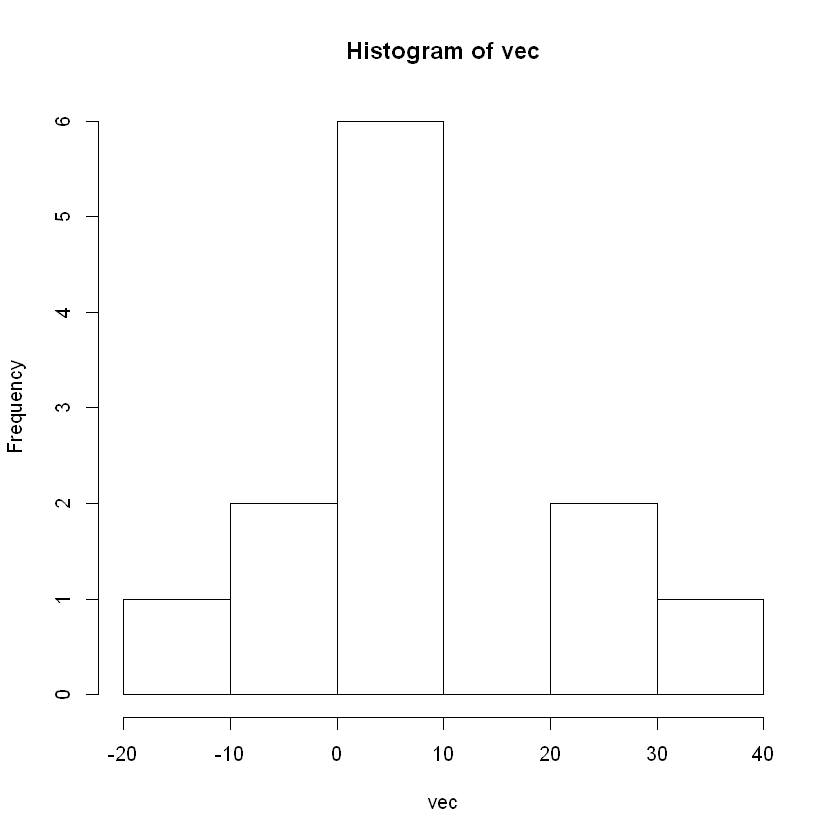

In [47]:
num='NODE_69966_length_869_cov_4.81941'
vec <-as.numeric(ht_samples3[num,HH])-as.numeric(ht_samples3[num,TT])
hist(vec)
m1 <-mean(as.numeric(ht_samples3[num,HH]))
m1
m2 <-mean(as.numeric(ht_samples3[num,TT]))
m2
ss<-sd(vec)
ss
pwr.t.test(d=(m1-m2)/ss,power=pp,sig.level=aa,type="paired",alternative="two.sided")


[1] 0.5833333

[1] 1.75

[1] 2.167249


     Paired t test power calculation 

              n = 38.23201
              d = 0.5383168
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number of *pairs*


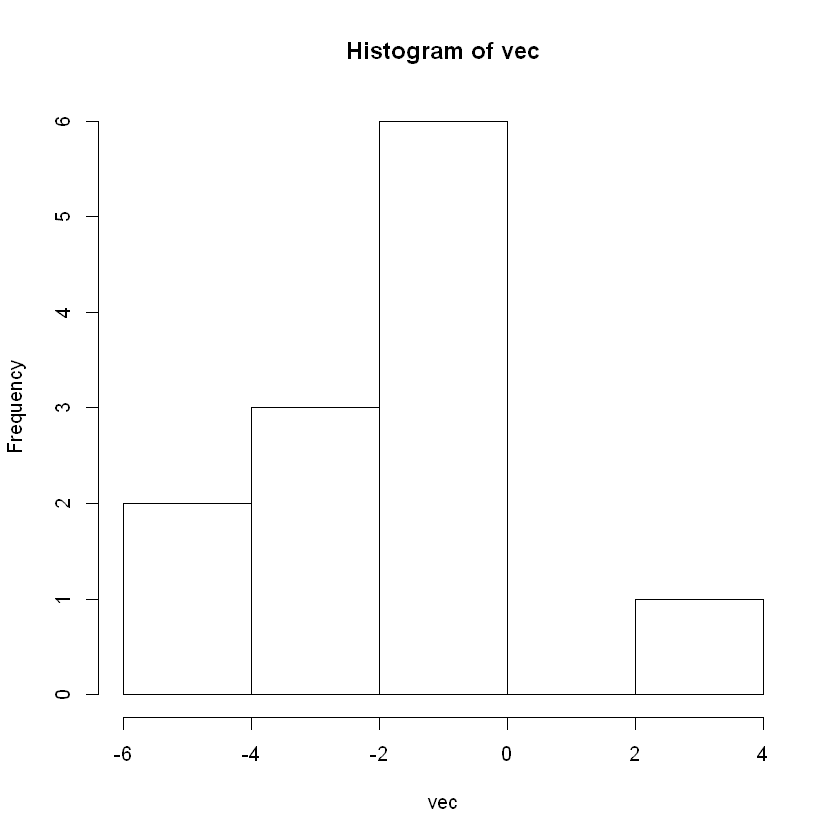

In [48]:
num='NODE_37738_length_975_cov_2.10435'
vec <-as.numeric(ht_samples3[num,HH])-as.numeric(ht_samples3[num,TT])
hist(vec)
m1 <-mean(as.numeric(ht_samples3[num,HH]))
m1
m2 <-mean(as.numeric(ht_samples3[num,TT]))
m2
ss<-sd(vec)
ss
pwr.t.test(d=(m1-m2)/ss,power=pp,sig.level=aa,type="paired",alternative="two.sided")